In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *
sns.set()

### Bandit settings

In [13]:
T = 10000
n_arms = 12 # a -> 숫자를 키워볼 것
n_features = 20 # d -> 숫자를 키워볼 것
n_assortment = 4
noise_std = 0.01 # noise of reward 0.01*N(0,1)

n_samples = 1 # number of samples for each round and arm, only for TS

n_sim = 2 # number of simulations

def F(x): # round_reward_function
    if len(np.shape(x)) == 1: # if x is a vector
        return np.sum(x)
    else: # if x is a matrix
        return np.sum(x, axis=1)      

### Parameter settings

In [14]:
reg_factor = 1.0 # lambda
delta = 0.1 # delta
exploration_variance = 1.0 # nu, only for TS
confidence_scaling_factor = 1.0 # gamma, only for UCB

### LinUCB on linear rewards

In [29]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 1*np.dot(a, x)

In [30]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, \
                          n_assortment=n_assortment, n_samples=n_samples, round_reward_function=F)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=reg_factor,
                   delta=delta,
                   confidence_scaling_factor=confidence_scaling_factor
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:08<00:00, 1114.07it/s, total regret=1.31e+3, % optimal super arm=6.83%]


### Sublinear regret growth : the bandit problem is solved efficiently

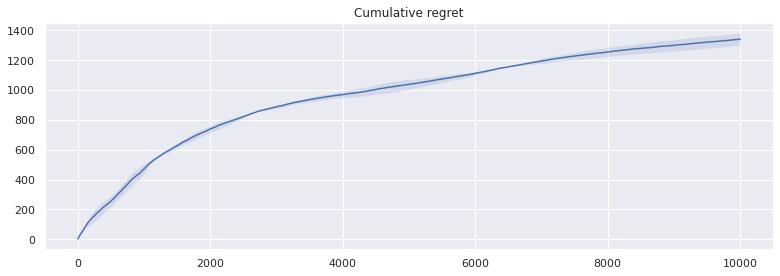

In [31]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('linear_ucb_linear.pdf')

### LinUCB on quadratic rewards

In [32]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 1*np.dot(a, x)**2

In [33]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, \
                          n_assortment=n_assortment, n_samples=n_samples, round_reward_function=F)

rregrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=reg_factor,
                   delta=delta,
                   confidence_scaling_factor=confidence_scaling_factor
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:09<00:00, 1079.43it/s, total regret=2.56e+3, % optimal super arm=0.00%]


### Linear regret growth: the bandit problem fails

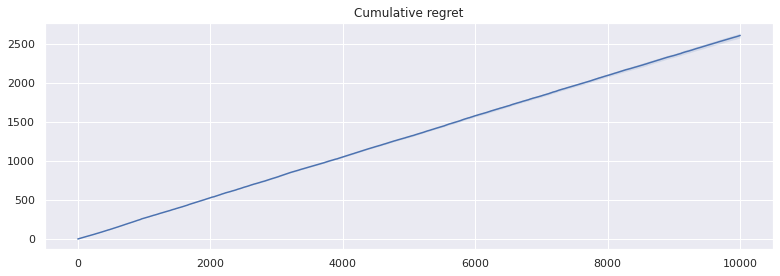

In [34]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

### LinUCB on nonlinear rewards

In [10]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 1*np.cos(np.pi*np.dot(x, a))

In [11]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, \
                          n_assortment=n_assortment, n_samples=n_samples, round_reward_function=F)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)  

100%|██████████| 10000/10000 [00:09<00:00, 1066.87it/s, total regret=7.65e+3, % optimal super arm=0.00%]


### Linear regret growth: the bandit problem fails

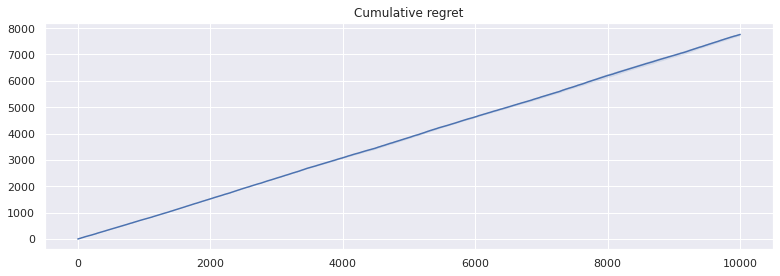

In [12]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('linear_ucb_cosine.pdf')